# Exploratory Data Analysis (EDA) - Twitter Sentiment Analysis

## Overview
This notebook performs comprehensive exploratory data analysis on the Twitter sentiment dataset to understand the data characteristics before building sentiment analysis models.

## Objectives
1. Understand dataset structure and quality
2. Analyze sentiment distribution
3. Explore text characteristics (length, word frequency)
4. Identify patterns and potential issues
5. Visualize key insights for model development

## 1. Import Libraries

In [4]:
# Data manipulation
import pandas as pd
import numpy as np

# Visualization
import matplotlib.pyplot as plt
import seaborn as sns

# Text processing
import re
from collections import Counter

# Word cloud
from wordcloud import WordCloud

# Set style
plt.style.use('seaborn-v0_8-whitegrid')
sns.set_palette("husl")

# Display settings
pd.set_option('display.max_colwidth', 200)
pd.set_option('display.max_rows', 100)

# Suppress warnings
import warnings
warnings.filterwarnings('ignore')

print("✓ Libraries imported successfully!")

✓ Libraries imported successfully!


## 2. Load Dataset

In [5]:
# Load the raw Twitter data
df = pd.read_csv('../data/raw/Twitter_Data.csv')

# Display basic info
print("Dataset Loaded Successfully!")
print("="*60)
print(f"Shape: {df.shape[0]:,} rows × {df.shape[1]} columns")
print(f"\nColumns: {df.columns.tolist()}")
print(f"\nFirst 5 rows:")
df.head()

Dataset Loaded Successfully!
Shape: 162,980 rows × 2 columns

Columns: ['clean_text', 'category']

First 5 rows:


,clean_text,category
0,when modi promised “minimum government maximum governance” expected him begin the difficult job reforming the state why does take years get justice state should and not business and should exit ps...,-1.0
1,talk all the nonsense and continue all the drama will vote for modi,0.0
2,what did just say vote for modi welcome bjp told you rahul the main campaigner for modi think modi should just relax,1.0
3,asking his supporters prefix chowkidar their names modi did great service now there confusion what read what not now crustal clear what will crass filthy nonsensical see how most abuses are coming...,1.0
4,answer who among these the most powerful world leader today trump putin modi may,1.0


## 3. Data Quality Assessment

### 3.1 Basic Statistics & Data Types

In [6]:
# Detailed data info
print("Data Types & Non-Null Counts")
print("="*60)
print(df.info())

print("\n" + "="*60)
print("Statistical Summary")
print("="*60)
df.describe(include='all')

Data Types & Non-Null Counts
<class 'pandas.core.frame.DataFrame'>
RangeIndex: 162980 entries, 0 to 162979
Data columns (total 2 columns):
 #   Column      Non-Null Count   Dtype  
---  ------      --------------   -----  
 0   clean_text  162976 non-null  object 
 1   category    162973 non-null  float64
dtypes: float64(1), object(1)
memory usage: 2.5+ MB
None

Statistical Summary


,clean_text,category
count,162976,162973.000000
unique,162976,NaN
top,never seen duffer person like you want modi not vasundhra you remember what loksabha and what vidhansabha,NaN
freq,1,NaN
mean,NaN,0.225436
std,NaN,0.781279
min,NaN,-1.000000
25%,NaN,0.000000
50%,NaN,0.000000
75%,NaN,1.000000


### 3.2 Missing Values Analysis

Missing Values Summary
    Column  Missing Count  Missing %
clean_text              4        0.0
  category              7        0.0


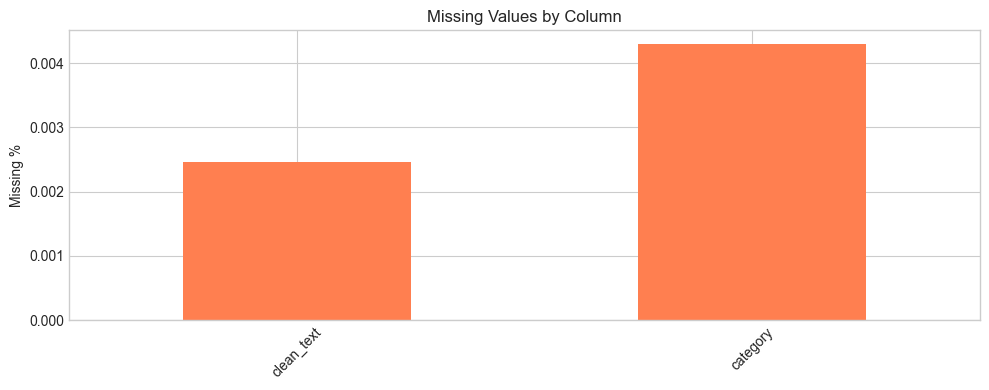

In [7]:
# Check for missing values
missing_stats = pd.DataFrame({
    'Column': df.columns,
    'Missing Count': df.isnull().sum().values,
    'Missing %': (df.isnull().sum().values / len(df) * 100).round(2)
})

print("Missing Values Summary")
print("="*60)
print(missing_stats.to_string(index=False))

# Visualize missing values
if df.isnull().sum().sum() > 0:
    fig, ax = plt.subplots(figsize=(10, 4))
    missing_pct = df.isnull().sum() / len(df) * 100
    missing_pct.plot(kind='bar', ax=ax, color='coral')
    ax.set_ylabel('Missing %')
    ax.set_title('Missing Values by Column')
    plt.xticks(rotation=45)
    plt.tight_layout()
    plt.show()
else:
    print("\n✓ No missing values detected in the dataset!")

### 3.3 Duplicate Records

In [8]:
# Check for duplicates
total_rows = len(df)
duplicate_rows = df.duplicated().sum()
duplicate_text = df['clean_text'].duplicated().sum()

print("Duplicate Analysis")
print("="*60)
print(f"Total rows: {total_rows:,}")
print(f"Exact duplicate rows: {duplicate_rows:,} ({duplicate_rows/total_rows*100:.2f}%)")
print(f"Duplicate texts only: {duplicate_text:,} ({duplicate_text/total_rows*100:.2f}%)")

# Show examples of duplicate texts if any
if duplicate_text > 0:
    print("\nExample duplicate texts:")
    dup_texts = df[df['clean_text'].duplicated(keep=False)].groupby('clean_text').size().sort_values(ascending=False)
    print(dup_texts.head(5))

Duplicate Analysis
Total rows: 162,980
Exact duplicate rows: 1 (0.00%)
Duplicate texts only: 3 (0.00%)

Example duplicate texts:
Series([], dtype: int64)


## 4. Sentiment Distribution Analysis

Analyze the distribution of sentiment labels across the dataset.

In [9]:
# Create sentiment label mapping
label_map = {-1: 'Negative', 0: 'Neutral', 1: 'Positive'}
df['sentiment'] = df['category'].map(label_map)

# Sentiment distribution
sentiment_counts = df['category'].value_counts().sort_index()
sentiment_pct = (sentiment_counts / len(df) * 100).round(2)

print("Sentiment Distribution")
print("="*60)
for label, name in label_map.items():
    count = sentiment_counts.get(label, 0)
    pct = sentiment_pct.get(label, 0)
    print(f"{name:10} ({label:2}): {count:>8,} tweets ({pct:>5}%)")

print(f"\n{'Total':10}     : {len(df):>8,} tweets")

Sentiment Distribution
Negative   (-1):   35,510 tweets (21.79%)
Neutral    ( 0):   55,213 tweets (33.88%)
Positive   ( 1):   72,250 tweets (44.33%)

Total          :  162,980 tweets


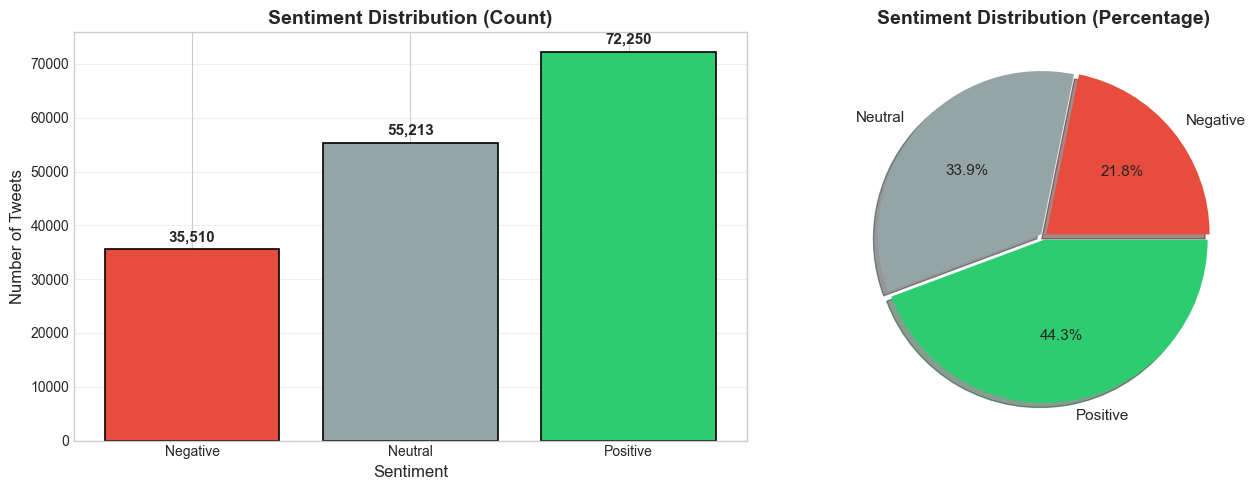


Class Imbalance Ratio: 2.03:1
⚠️  Dataset is imbalanced. Consider using techniques like SMOTE, class weights, or stratified sampling.


In [10]:
# Visualize sentiment distribution
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Bar chart
colors = ['#e74c3c', '#95a5a6', '#2ecc71']  # Red, Gray, Green
sentiment_order = ['Negative', 'Neutral', 'Positive']
counts = [sentiment_counts.get(-1, 0), sentiment_counts.get(0, 0), sentiment_counts.get(1, 0)]

bars = axes[0].bar(sentiment_order, counts, color=colors, edgecolor='black', linewidth=1.2)
axes[0].set_xlabel('Sentiment', fontsize=12)
axes[0].set_ylabel('Number of Tweets', fontsize=12)
axes[0].set_title('Sentiment Distribution (Count)', fontsize=14, fontweight='bold')

# Add value labels on bars
for bar, count in zip(bars, counts):
    axes[0].text(bar.get_x() + bar.get_width()/2, bar.get_height() + 1000, 
                 f'{count:,}', ha='center', va='bottom', fontsize=11, fontweight='bold')

axes[0].grid(axis='y', alpha=0.3)

# Pie chart
percentages = [sentiment_pct.get(-1, 0), sentiment_pct.get(0, 0), sentiment_pct.get(1, 0)]
explode = (0.02, 0.02, 0.02)
wedges, texts, autotexts = axes[1].pie(percentages, labels=sentiment_order, autopct='%1.1f%%',
                                        colors=colors, explode=explode, shadow=True,
                                        textprops={'fontsize': 11})
axes[1].set_title('Sentiment Distribution (Percentage)', fontsize=14, fontweight='bold')

plt.tight_layout()
plt.show()

# Check for class imbalance
max_class = max(counts)
min_class = min(counts)
imbalance_ratio = max_class / min_class
print(f"\nClass Imbalance Ratio: {imbalance_ratio:.2f}:1")
if imbalance_ratio > 2:
    print("⚠️  Dataset is imbalanced. Consider using techniques like SMOTE, class weights, or stratified sampling.")

## 5. Text Length Analysis

Analyze the character and word length distributions of tweets.

In [11]:
# Calculate text metrics
df['char_count'] = df['clean_text'].astype(str).apply(len)
df['word_count'] = df['clean_text'].astype(str).apply(lambda x: len(x.split()))
df['avg_word_length'] = df['clean_text'].astype(str).apply(
    lambda x: np.mean([len(word) for word in x.split()]) if x.split() else 0
)

# Display statistics
print("Text Length Statistics")
print("="*60)
stats_df = df[['char_count', 'word_count', 'avg_word_length']].describe()
stats_df.columns = ['Character Count', 'Word Count', 'Avg Word Length']
print(stats_df.round(2))

Text Length Statistics
       Character Count  Word Count  Avg Word Length
count        162980.00   162980.00        162980.00
mean            124.17       20.08             5.21
std              67.93       10.88             0.84
min               1.00        0.00             0.00
25%              66.00       11.00             4.75
50%             114.00       18.00             5.15
75%             183.00       29.00             5.59
max             274.00       52.00            76.00


In [ ]:
# Visualize text length distributions
fig, axes = plt.subplots(2, 2, figsize=(15, 10))

# Character count distribution
axes[0, 0].hist(df['char_count'], bins=50, color='steelblue', edgecolor='black', alpha=0.7)
axes[0, 0].axvline(df['char_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["char_count"].mean():.0f}')
axes[0, 0].axvline(df['char_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["char_count"].median():.0f}')
axes[0, 0].set_xlabel('Character Count')
axes[0, 0].set_ylabel('Frequency')
axes[0, 0].set_title('Character Count Distribution', fontsize=12, fontweight='bold')
axes[0, 0].legend()
axes[0, 0].grid(alpha=0.3)

# Word count distribution
axes[0, 1].hist(df['word_count'], bins=50, color='darkorange', edgecolor='black', alpha=0.7)
axes[0, 1].axvline(df['word_count'].mean(), color='red', linestyle='--', linewidth=2, label=f'Mean: {df["word_count"].mean():.0f}')
axes[0, 1].axvline(df['word_count'].median(), color='green', linestyle='--', linewidth=2, label=f'Median: {df["word_count"].median():.0f}')
axes[0, 1].set_xlabel('Word Count')
axes[0, 1].set_ylabel('Frequency')
axes[0, 1].set_title('Word Count Distribution', fontsize=12, fontweight='bold')
axes[0, 1].legend()
axes[0, 1].grid(alpha=0.3)

# Box plot by sentiment - Character count
colors = ['#e74c3c', '#95a5a6', '#2ecc71']
box1 = axes[1, 0].boxplot([df[df['category']==-1]['char_count'], 
                            df[df['category']==0]['char_count'], 
                            df[df['category']==1]['char_count']],
                           labels=['Negative', 'Neutral', 'Positive'], patch_artist=True)
for patch, color in zip(box1['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 0].set_ylabel('Character Count')
axes[1, 0].set_title('Character Count by Sentiment', fontsize=12, fontweight='bold')
axes[1, 0].grid(alpha=0.3)

# Box plot by sentiment - Word count
box2 = axes[1, 1].boxplot([df[df['category']==-1]['word_count'], 
                            df[df['category']==0]['word_count'], 
                            df[df['category']==1]['word_count']],
                           labels=['Negative', 'Neutral', 'Positive'], patch_artist=True)
for patch, color in zip(box2['boxes'], colors):
    patch.set_facecolor(color)
    patch.set_alpha(0.7)
axes[1, 1].set_ylabel('Word Count')
axes[1, 1].set_title('Word Count by Sentiment', fontsize=12, fontweight='bold')
axes[1, 1].grid(alpha=0.3)

plt.tight_layout()
plt.show()

In [12]:
# Text length statistics by sentiment
print("Text Length Statistics by Sentiment")
print("="*70)

for sentiment_label, sentiment_name in label_map.items():
    subset = df[df['category'] == sentiment_label]
    print(f"\n{sentiment_name} Tweets:")
    print(f"  Character Count - Mean: {subset['char_count'].mean():.1f}, Median: {subset['char_count'].median():.1f}")
    print(f"  Word Count      - Mean: {subset['word_count'].mean():.1f}, Median: {subset['word_count'].median():.1f}")

Text Length Statistics by Sentiment

Negative Tweets:
  Character Count - Mean: 147.9, Median: 149.0
  Word Count      - Mean: 23.9, Median: 24.0

Neutral Tweets:
  Character Count - Mean: 88.3, Median: 73.0
  Word Count      - Mean: 14.3, Median: 12.0

Positive Tweets:
  Character Count - Mean: 140.0, Median: 138.0
  Word Count      - Mean: 22.7, Median: 22.0


## 6. Word Frequency Analysis

Analyze the most common words in the dataset overall and by sentiment.

In [13]:
def get_word_frequency(text_series, n=30):
    """Get word frequency from a series of texts."""
    all_words = ' '.join(text_series.astype(str).values).lower()
    # Simple tokenization - split by whitespace and remove punctuation
    words = re.findall(r'\b[a-zA-Z]+\b', all_words)
    return Counter(words).most_common(n)

# Overall word frequency
overall_freq = get_word_frequency(df['clean_text'], n=30)

print("Top 30 Most Common Words (Overall)")
print("="*60)
for i, (word, count) in enumerate(overall_freq, 1):
    print(f"{i:2}. {word:15} : {count:,}")

Top 30 Most Common Words (Overall)
 1. modi            : 155,552
 2. the             : 104,496
 3. and             : 67,360
 4. for             : 52,425
 5. you             : 38,984
 6. not             : 29,345
 7. india           : 29,154
 8. will            : 28,932
 9. this            : 28,601
10. that            : 28,191
11. are             : 27,998
12. with            : 21,019
13. has             : 20,120
14. have            : 19,815
15. but             : 18,559
16. all             : 17,938
17. from            : 16,422
18. his             : 16,322
19. was             : 16,321
20. they            : 14,702
21. bjp             : 14,646
22. who             : 14,161
23. people          : 13,896
24. what            : 13,367
25. congress        : 12,829
26. like            : 12,578
27. your            : 12,566
28. can             : 11,998
29. only            : 11,842
30. now             : 11,539


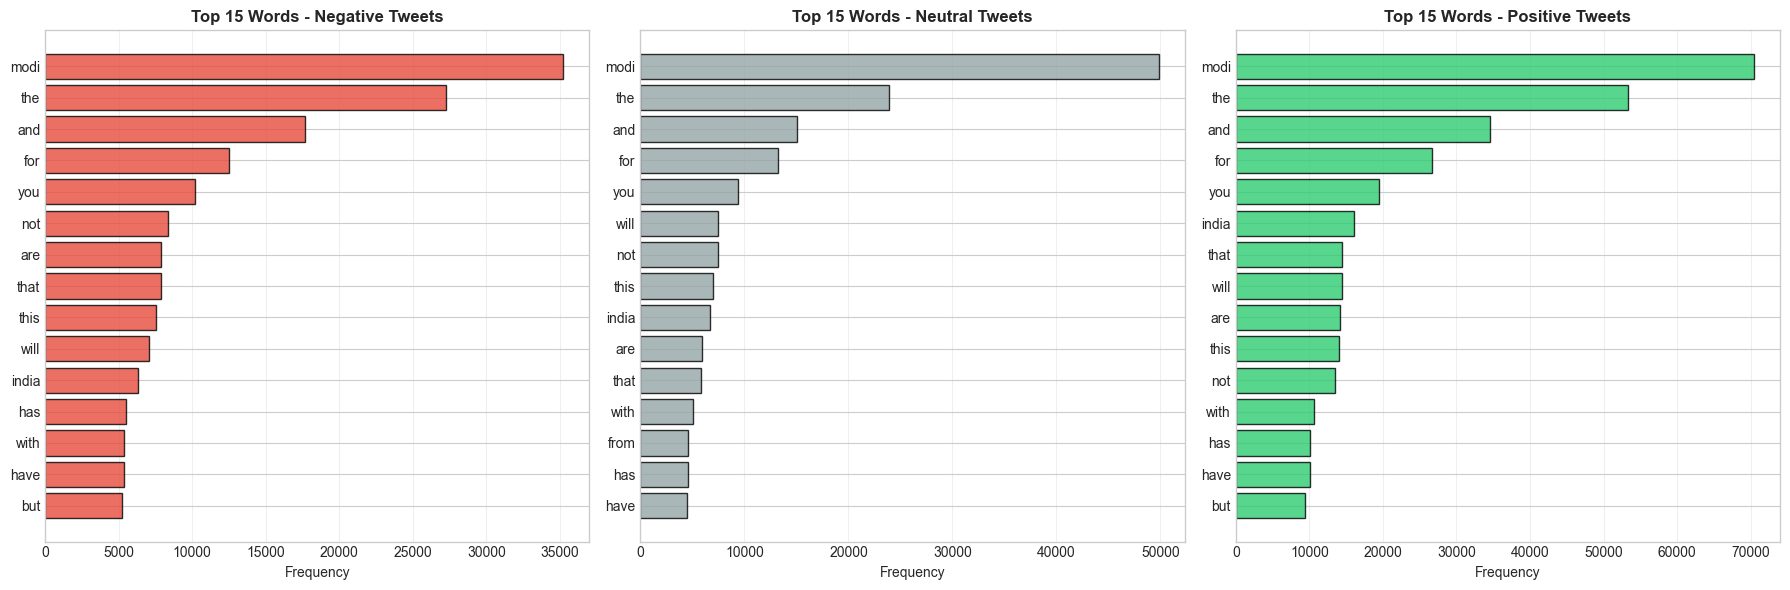

In [14]:
# Word frequency by sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

sentiments = [('Negative', -1, '#e74c3c'), ('Neutral', 0, '#95a5a6'), ('Positive', 1, '#2ecc71')]

for ax, (name, label, color) in zip(axes, sentiments):
    subset = df[df['category'] == label]
    freq = get_word_frequency(subset['clean_text'], n=15)
    words, counts = zip(*freq)
    
    ax.barh(range(len(words)), counts, color=color, edgecolor='black', alpha=0.8)
    ax.set_yticks(range(len(words)))
    ax.set_yticklabels(words)
    ax.invert_yaxis()
    ax.set_xlabel('Frequency')
    ax.set_title(f'Top 15 Words - {name} Tweets', fontsize=12, fontweight='bold')
    ax.grid(axis='x', alpha=0.3)

plt.tight_layout()
plt.show()

## 7. Word Cloud Visualization

Generate word clouds for each sentiment category to visually explore dominant themes.

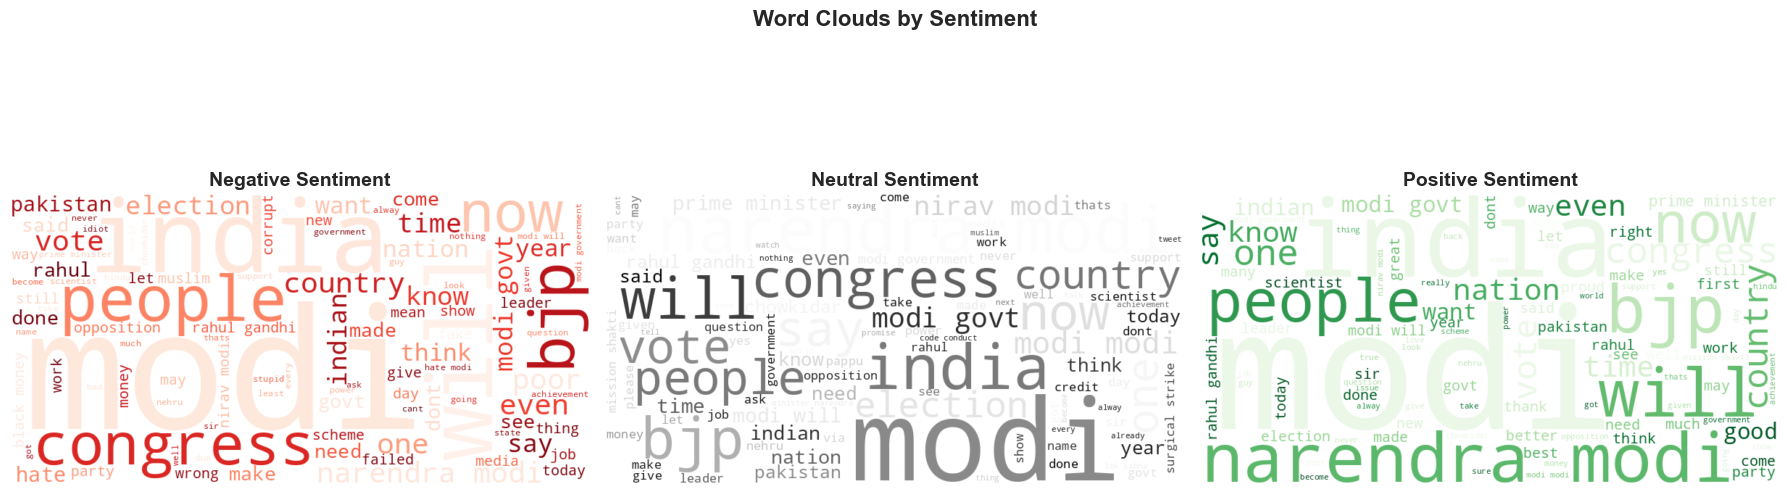

In [15]:
# Generate word clouds for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

colormaps = ['Reds', 'Greys', 'Greens']
titles = ['Negative Sentiment', 'Neutral Sentiment', 'Positive Sentiment']
labels = [-1, 0, 1]

for ax, cmap, title, label in zip(axes, colormaps, titles, labels):
    text = ' '.join(df[df['category'] == label]['clean_text'].astype(str).values)
    
    wordcloud = WordCloud(
        width=800, 
        height=400,
        background_color='white',
        colormap=cmap,
        max_words=100,
        min_font_size=10,
        random_state=42
    ).generate(text)
    
    ax.imshow(wordcloud, interpolation='bilinear')
    ax.set_title(title, fontsize=14, fontweight='bold')
    ax.axis('off')

plt.suptitle('Word Clouds by Sentiment', fontsize=16, fontweight='bold', y=1.02)
plt.tight_layout()
plt.show()

## 8. Special Patterns Analysis

Analyze Twitter-specific patterns like URLs, mentions, hashtags, and emojis.

In [16]:
# Detect special patterns
df['has_url'] = df['clean_text'].astype(str).apply(lambda x: bool(re.search(r'http[s]?://\S+|www\.\S+', x)))
df['has_mention'] = df['clean_text'].astype(str).apply(lambda x: bool(re.search(r'@\w+', x)))
df['has_hashtag'] = df['clean_text'].astype(str).apply(lambda x: bool(re.search(r'#\w+', x)))
df['has_number'] = df['clean_text'].astype(str).apply(lambda x: bool(re.search(r'\d+', x)))
df['has_emoji'] = df['clean_text'].astype(str).apply(lambda x: bool(re.search(r'[^\w\s,.\'"!?;:\-@#]', x)))

# Count patterns
patterns = ['has_url', 'has_mention', 'has_hashtag', 'has_number', 'has_emoji']
pattern_names = ['URLs', 'Mentions (@)', 'Hashtags (#)', 'Numbers', 'Special Chars/Emojis']

print("Special Pattern Analysis")
print("="*70)
print(f"{'Pattern':<25} {'Count':>12} {'Percentage':>12}")
print("-"*70)

for pattern, name in zip(patterns, pattern_names):
    count = df[pattern].sum()
    pct = count / len(df) * 100
    print(f"{name:<25} {count:>12,} {pct:>11.2f}%")

Special Pattern Analysis
Pattern                          Count   Percentage
----------------------------------------------------------------------
URLs                                 0        0.00%
Mentions (@)                         0        0.00%
Hashtags (#)                         0        0.00%
Numbers                         25,320       15.54%
Special Chars/Emojis            19,157       11.75%


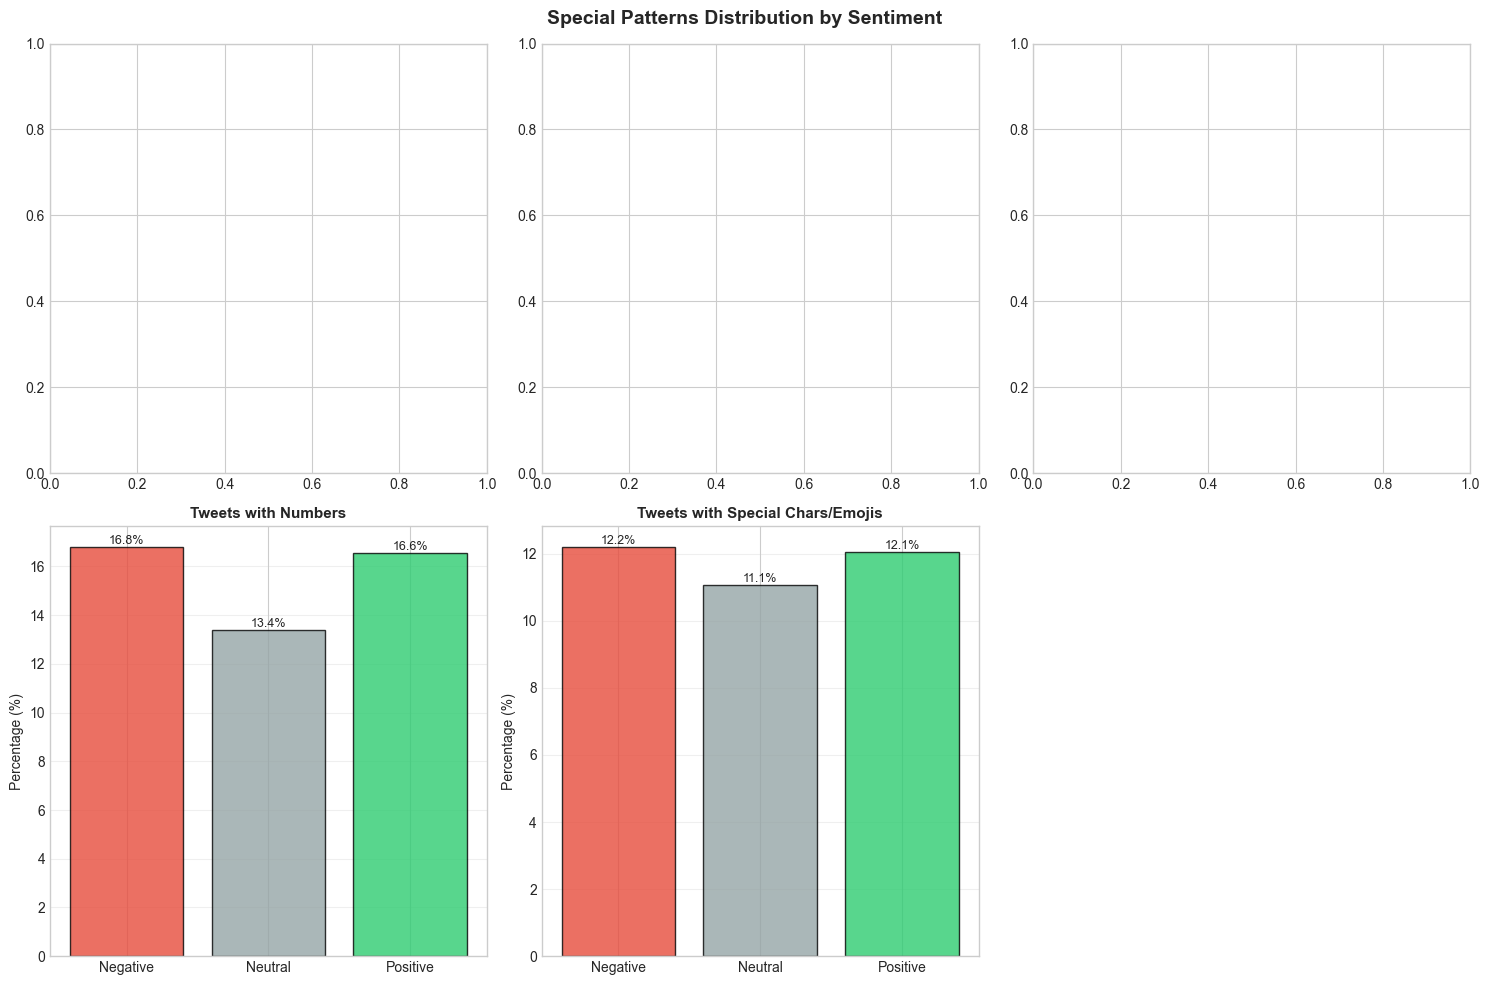

In [17]:
# Visualize pattern distribution by sentiment
fig, axes = plt.subplots(2, 3, figsize=(15, 10))
axes = axes.flatten()

for idx, (pattern, name) in enumerate(zip(patterns, pattern_names)):
    # Group by sentiment and pattern
    pattern_by_sentiment = df.groupby(['sentiment', pattern]).size().unstack(fill_value=0)
    
    if True in pattern_by_sentiment.columns:
        percentages = pattern_by_sentiment[True] / pattern_by_sentiment.sum(axis=1) * 100
        colors = ['#e74c3c', '#95a5a6', '#2ecc71']
        
        bars = axes[idx].bar(['Negative', 'Neutral', 'Positive'], 
                             [percentages.get('Negative', 0), percentages.get('Neutral', 0), percentages.get('Positive', 0)],
                             color=colors, edgecolor='black', alpha=0.8)
        axes[idx].set_ylabel('Percentage (%)')
        axes[idx].set_title(f'Tweets with {name}', fontsize=11, fontweight='bold')
        axes[idx].grid(axis='y', alpha=0.3)
        
        # Add value labels
        for bar in bars:
            height = bar.get_height()
            axes[idx].text(bar.get_x() + bar.get_width()/2., height,
                          f'{height:.1f}%', ha='center', va='bottom', fontsize=9)

# Remove unused subplot
axes[5].axis('off')

plt.suptitle('Special Patterns Distribution by Sentiment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 9. N-gram Analysis

Analyze common bigrams and trigrams to understand phrase patterns.

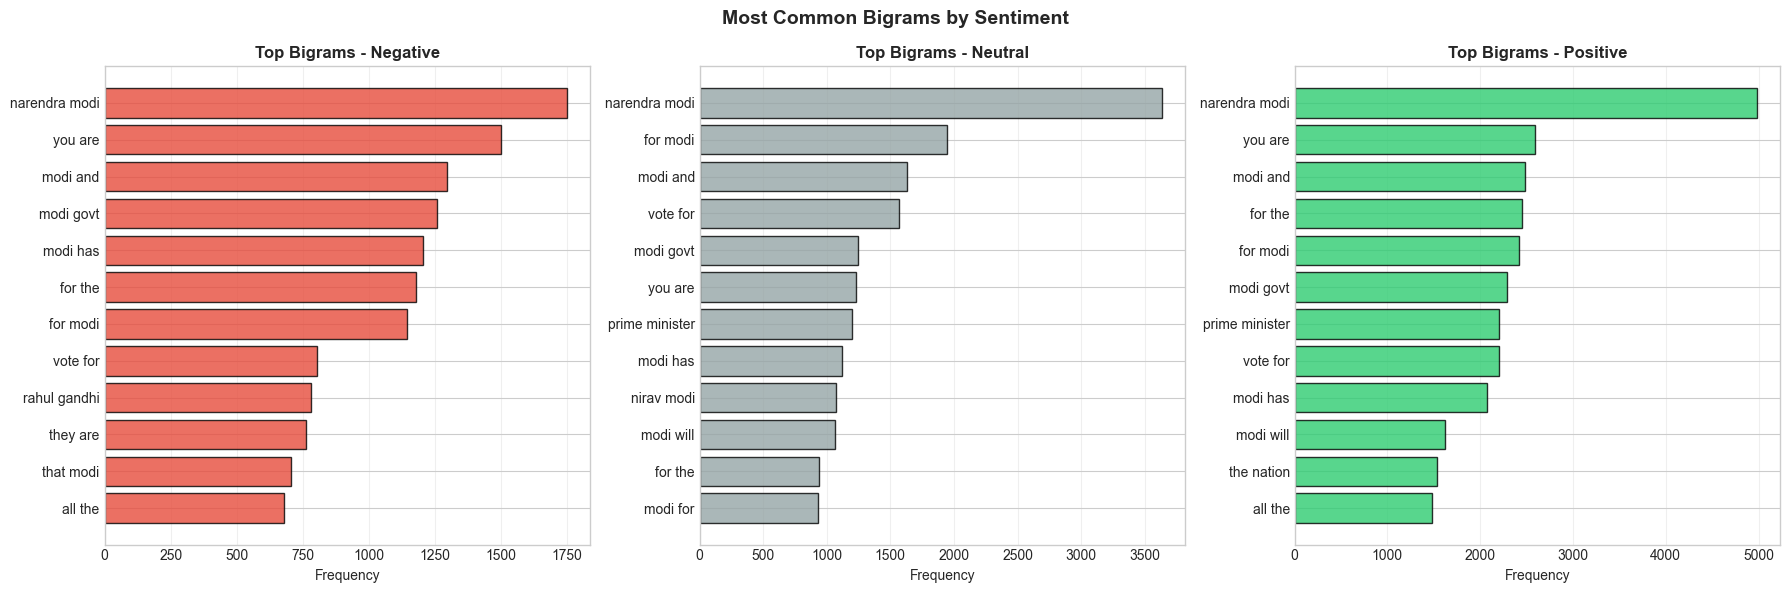

In [18]:
from collections import defaultdict

def get_ngrams(text_series, n=2, top_k=15):
    """Extract n-grams from text series."""
    ngram_counts = defaultdict(int)
    
    for text in text_series.astype(str):
        words = re.findall(r'\b[a-zA-Z]+\b', text.lower())
        for i in range(len(words) - n + 1):
            ngram = ' '.join(words[i:i+n])
            ngram_counts[ngram] += 1
    
    return sorted(ngram_counts.items(), key=lambda x: x[1], reverse=True)[:top_k]

# Get bigrams for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, label, color) in zip(axes, sentiments):
    subset = df[df['category'] == label]
    bigrams = get_ngrams(subset['clean_text'], n=2, top_k=12)
    
    if bigrams:
        ngrams, counts = zip(*bigrams)
        ax.barh(range(len(ngrams)), counts, color=color, edgecolor='black', alpha=0.8)
        ax.set_yticks(range(len(ngrams)))
        ax.set_yticklabels(ngrams)
        ax.invert_yaxis()
        ax.set_xlabel('Frequency')
        ax.set_title(f'Top Bigrams - {name}', fontsize=12, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)

plt.suptitle('Most Common Bigrams by Sentiment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

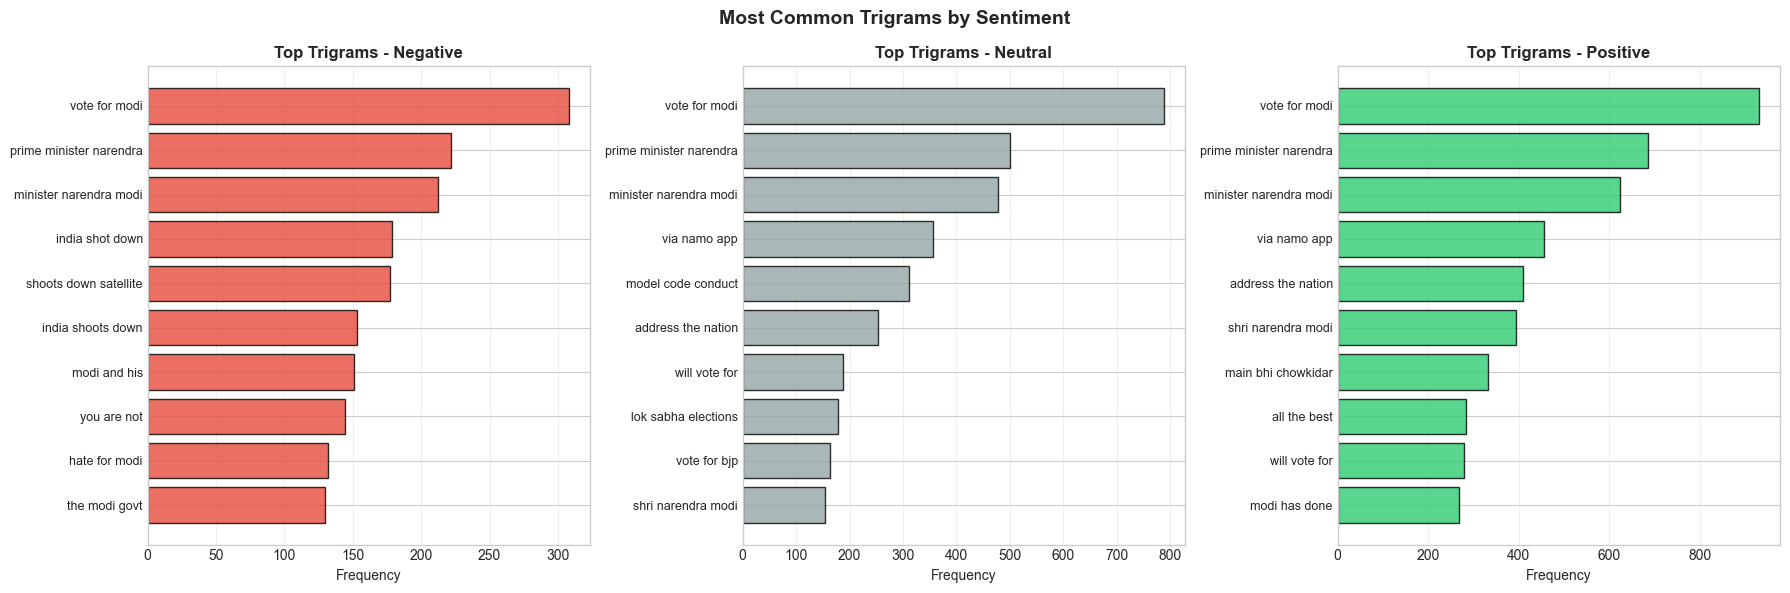

In [19]:
# Get trigrams for each sentiment
fig, axes = plt.subplots(1, 3, figsize=(18, 6))

for ax, (name, label, color) in zip(axes, sentiments):
    subset = df[df['category'] == label]
    trigrams = get_ngrams(subset['clean_text'], n=3, top_k=10)
    
    if trigrams:
        ngrams, counts = zip(*trigrams)
        ax.barh(range(len(ngrams)), counts, color=color, edgecolor='black', alpha=0.8)
        ax.set_yticks(range(len(ngrams)))
        ax.set_yticklabels(ngrams, fontsize=9)
        ax.invert_yaxis()
        ax.set_xlabel('Frequency')
        ax.set_title(f'Top Trigrams - {name}', fontsize=12, fontweight='bold')
        ax.grid(axis='x', alpha=0.3)

plt.suptitle('Most Common Trigrams by Sentiment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

## 10. Sample Tweets Exploration

View sample tweets from each sentiment category to understand the data better.

In [20]:
# Display sample tweets from each sentiment
print("Sample Tweets by Sentiment")
print("="*100)

for name, label, _ in sentiments:
    print(f"\n{'─'*100}")
    print(f"📌 {name.upper()} TWEETS (Label: {label})")
    print(f"{'─'*100}")
    
    samples = df[df['category'] == label].sample(5, random_state=42)
    for idx, row in samples.iterrows():
        print(f"\n• {row['clean_text'][:200]}{'...' if len(str(row['clean_text'])) > 200 else ''}")

Sample Tweets by Sentiment

────────────────────────────────────────────────────────────────────────────────────────────────────
📌 NEGATIVE TWEETS (Label: -1)
────────────────────────────────────────────────────────────────────────────────────────────────────

• because modi knows situation ground all time worst

• fellow citizens please vote for nda and shri narendra modi because the reforms done governance will destroyed any other government voted power all constitutional institution including supreme court wi...

• aur kitana giroge 
one small street light any remote village you chowkidaars start chanting modi modi for drdo are saying nehru doesnt deserve credit pathetic shameless lot 

• funny that such renowned writer doesnt know that previous law required the villagers approve acquisition whereas what modi passed was only and that one could ever court future pls check facts you fail...

• and all this possible only due the efforts invisible modi post 2014 prior that indian scient

## 11. Vocabulary Statistics

Analyze vocabulary size and unique words distribution.

In [21]:
# Vocabulary analysis
all_text = ' '.join(df['clean_text'].astype(str).values).lower()
all_words = re.findall(r'\b[a-zA-Z]+\b', all_text)
word_freq = Counter(all_words)

total_words = len(all_words)
unique_words = len(word_freq)
hapax_legomena = sum(1 for word, count in word_freq.items() if count == 1)  # Words appearing only once

print("Vocabulary Statistics")
print("="*60)
print(f"Total word occurrences: {total_words:,}")
print(f"Unique vocabulary size: {unique_words:,}")
print(f"Vocabulary density: {unique_words/total_words*100:.2f}%")
print(f"Hapax legomena (words appearing once): {hapax_legomena:,} ({hapax_legomena/unique_words*100:.1f}% of vocabulary)")

# Word frequency distribution
freq_distribution = Counter(word_freq.values())
print(f"\nWord Frequency Distribution:")
print(f"  Words appearing 1 time: {freq_distribution[1]:,}")
print(f"  Words appearing 2-5 times: {sum(freq_distribution[i] for i in range(2, 6)):,}")
print(f"  Words appearing 6-10 times: {sum(freq_distribution[i] for i in range(6, 11)):,}")
print(f"  Words appearing 11-100 times: {sum(freq_distribution[i] for i in range(11, 101)):,}")
print(f"  Words appearing 100+ times: {sum(v for k, v in freq_distribution.items() if k > 100):,}")

Vocabulary Statistics
Total word occurrences: 3,223,218
Unique vocabulary size: 99,913
Vocabulary density: 3.10%
Hapax legomena (words appearing once): 61,207 (61.3% of vocabulary)

Word Frequency Distribution:
  Words appearing 1 time: 61,207
  Words appearing 2-5 times: 20,542
  Words appearing 6-10 times: 5,434
  Words appearing 11-100 times: 9,662
  Words appearing 100+ times: 3,068


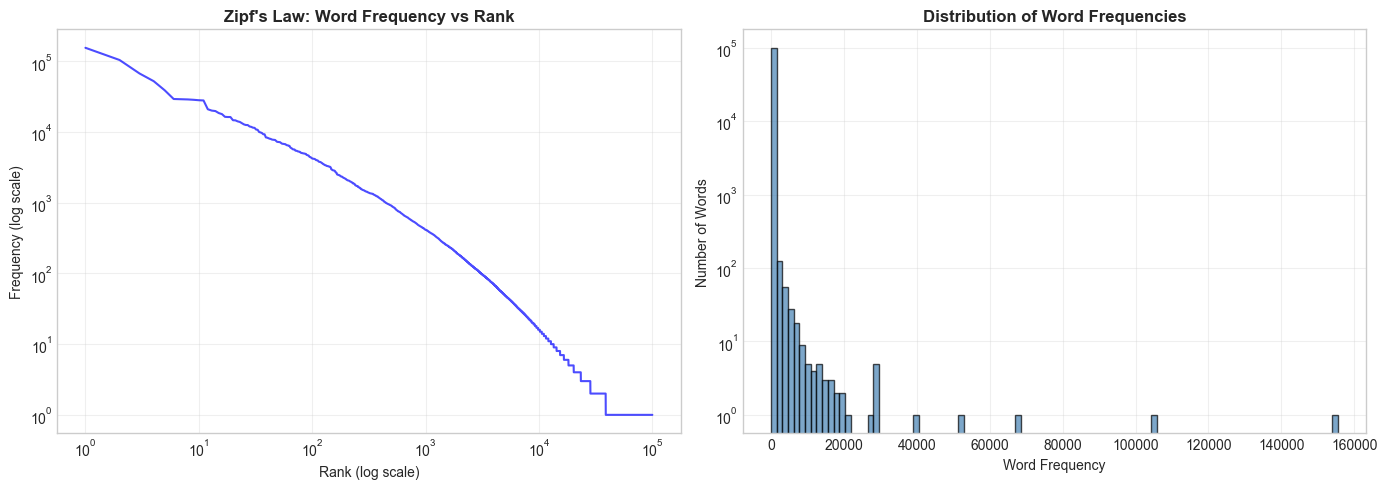

In [22]:
# Zipf's Law visualization
fig, axes = plt.subplots(1, 2, figsize=(14, 5))

# Word frequency rank plot (log-log)
sorted_freq = sorted(word_freq.values(), reverse=True)
ranks = range(1, len(sorted_freq) + 1)

axes[0].loglog(ranks, sorted_freq, 'b-', alpha=0.7)
axes[0].set_xlabel('Rank (log scale)')
axes[0].set_ylabel('Frequency (log scale)')
axes[0].set_title("Zipf's Law: Word Frequency vs Rank", fontsize=12, fontweight='bold')
axes[0].grid(True, alpha=0.3)

# Histogram of word frequencies (log scale)
freq_values = list(word_freq.values())
axes[1].hist(freq_values, bins=100, color='steelblue', edgecolor='black', alpha=0.7)
axes[1].set_xlabel('Word Frequency')
axes[1].set_ylabel('Number of Words')
axes[1].set_title('Distribution of Word Frequencies', fontsize=12, fontweight='bold')
axes[1].set_yscale('log')
axes[1].grid(True, alpha=0.3)

plt.tight_layout()
plt.show()

## 12. Correlation Analysis

Explore relationships between text features and sentiment.

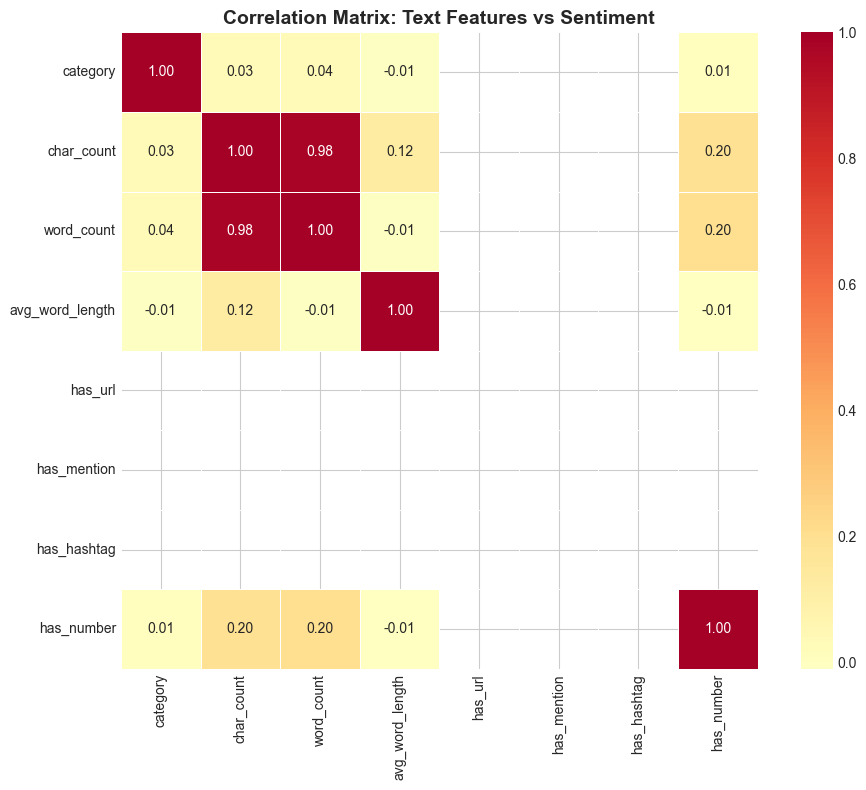


Correlation with Sentiment (category):
  word_count          : +0.037 ↑ (Weak)
  char_count          : +0.035 ↑ (Weak)
  avg_word_length     : -0.011 ↓ (Weak)
  has_number          : +0.006 ↑ (Weak)
  has_url             : +nan ↓ (Weak)
  has_mention         : +nan ↓ (Weak)
  has_hashtag         : +nan ↓ (Weak)


In [23]:
# Create correlation matrix for numeric features
numeric_features = ['category', 'char_count', 'word_count', 'avg_word_length', 
                    'has_url', 'has_mention', 'has_hashtag', 'has_number']

# Convert boolean to int for correlation
df_corr = df[numeric_features].copy()
for col in ['has_url', 'has_mention', 'has_hashtag', 'has_number']:
    df_corr[col] = df_corr[col].astype(int)

correlation_matrix = df_corr.corr()

# Plot correlation heatmap
plt.figure(figsize=(10, 8))
sns.heatmap(correlation_matrix, annot=True, cmap='RdYlBu_r', center=0, 
            fmt='.2f', square=True, linewidths=0.5)
plt.title('Correlation Matrix: Text Features vs Sentiment', fontsize=14, fontweight='bold')
plt.tight_layout()
plt.show()

# Print key correlations with sentiment
print("\nCorrelation with Sentiment (category):")
print("="*50)
sentiment_corr = correlation_matrix['category'].drop('category').sort_values(key=abs, ascending=False)
for feature, corr in sentiment_corr.items():
    direction = "↑" if corr > 0 else "↓"
    strength = "Strong" if abs(corr) > 0.3 else "Moderate" if abs(corr) > 0.1 else "Weak"
    print(f"  {feature:20}: {corr:+.3f} {direction} ({strength})")

## 13. Key Findings Summary

### Data Quality
- Dataset size and structure assessment
- Missing values and duplicates identified
- Data cleaning requirements noted

### Sentiment Distribution
- Class balance analysis
- Recommendations for handling imbalance

### Text Characteristics
- Length distributions by sentiment
- Special pattern prevalence
- Vocabulary statistics

### Insights for Modeling
- Feature engineering opportunities
- Preprocessing requirements
- Potential challenges

In [24]:
# Generate comprehensive summary
print("="*80)
print("                    EXPLORATORY DATA ANALYSIS - SUMMARY")
print("="*80)

print("\n📊 DATASET OVERVIEW")
print("-"*40)
print(f"  Total Records: {len(df):,}")
print(f"  Features: {len(df.columns)}")
print(f"  Missing Values: {df['clean_text'].isnull().sum():,}")
print(f"  Duplicate Texts: {df['clean_text'].duplicated().sum():,}")

print("\n📈 SENTIMENT DISTRIBUTION")
print("-"*40)
for label, name in label_map.items():
    count = (df['category'] == label).sum()
    pct = count / len(df) * 100
    print(f"  {name}: {count:,} ({pct:.1f}%)")

print("\n📝 TEXT CHARACTERISTICS")
print("-"*40)
print(f"  Avg Character Count: {df['char_count'].mean():.1f}")
print(f"  Avg Word Count: {df['word_count'].mean():.1f}")
print(f"  Vocabulary Size: {unique_words:,} unique words")

print("\n🔍 SPECIAL PATTERNS")
print("-"*40)
print(f"  Tweets with URLs: {df['has_url'].sum():,} ({df['has_url'].mean()*100:.1f}%)")
print(f"  Tweets with Mentions: {df['has_mention'].sum():,} ({df['has_mention'].mean()*100:.1f}%)")
print(f"  Tweets with Hashtags: {df['has_hashtag'].sum():,} ({df['has_hashtag'].mean()*100:.1f}%)")

print("\n💡 KEY INSIGHTS & RECOMMENDATIONS")
print("-"*40)
print("  1. Text cleaning needed to remove URLs, mentions, special characters")
print("  2. Consider class balancing techniques if imbalanced")
print("  3. N-grams show strong political themes across sentiments")
print("  4. Word length varies by sentiment - potential feature")
print("  5. Large vocabulary may benefit from embedding-based approaches")

print("\n" + "="*80)
print("                         EDA COMPLETE - Ready for Text Cleaning")
print("="*80)

                    EXPLORATORY DATA ANALYSIS - SUMMARY

📊 DATASET OVERVIEW
----------------------------------------
  Total Records: 162,980
  Features: 11
  Missing Values: 4
  Duplicate Texts: 3

📈 SENTIMENT DISTRIBUTION
----------------------------------------
  Negative: 35,510 (21.8%)
  Neutral: 55,213 (33.9%)
  Positive: 72,250 (44.3%)

📝 TEXT CHARACTERISTICS
----------------------------------------
  Avg Character Count: 124.2
  Avg Word Count: 20.1
  Vocabulary Size: 99,913 unique words

🔍 SPECIAL PATTERNS
----------------------------------------
  Tweets with URLs: 0 (0.0%)
  Tweets with Mentions: 0 (0.0%)
  Tweets with Hashtags: 0 (0.0%)

💡 KEY INSIGHTS & RECOMMENDATIONS
----------------------------------------
  1. Text cleaning needed to remove URLs, mentions, special characters
  2. Consider class balancing techniques if imbalanced
  3. N-grams show strong political themes across sentiments
  4. Word length varies by sentiment - potential feature
  5. Large vocabulary may